## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#importing the necessary packages for this project

In [4]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
#importing csv and reading through pandas 

In [5]:
movie_budgets
#looking at data frame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
con = sqlite3.connect('../zippedData/im.db/im.db')
cursor_obj = con.cursor()
#connecting to sql and cursor object

In [7]:
%%bash

sqlite3 '../zippedData/im.db/im.db'
.schema

#Taking a look at the schema of the im.db file 

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [8]:
imdb_moviebasics = pd.read_sql  ("""
SELECT movie_id,
        primary_title as title,
        start_year as year,
        CAST(runtime_minutes as int) as runtime,
        genres
FROM movie_basics


""", con)
#Selecting columns from the the movie_basics table

In [9]:
imdb_moviebasics = imdb_moviebasics.loc[(imdb_moviebasics['year'] > 2010)]
#Reassigning the data frame to only have movies that occur greater than the year 2010

In [10]:
imdb_moviebasics

,movie_id,title,year,runtime,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,None


In [11]:
imdb_moviebasics.dropna(subset = ['runtime'], inplace = True)
#dropping nulls from the column runtime

In [12]:
imdb_moviebasics.info()
#Checking out the info to see if the function above worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104419 entries, 0 to 146142
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie_id  104419 non-null  object 
 1   title     104419 non-null  object 
 2   year      104419 non-null  int64  
 3   runtime   104419 non-null  float64
 4   genres    102440 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ MB


In [13]:
imdb_d_mb = pd.read_sql  ("""
SELECT mb.movie_id,
        mb.primary_title as title,
        mb.start_year as year,
        mb.runtime_minutes as runtime,
        mb.genres,
        d.person_id as director,
        m.averagerating,
        m.numvotes
        
FROM movie_basics as mb
    INNER JOIN
    directors as d
    ON
    mb.movie_id = d.movie_id
    
    INNER JOIN
    movie_ratings as m
    ON
    mb.movie_id = m.movie_id

""", con)
#Joining directors and average rating and number of votes

In [14]:
imdb_d_mb

,movie_id,title,year,runtime,genres,director,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",nm0002411,7.2,43
...,...,...,...,...,...,...,...,...
181384,tt9914642,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181385,tt9914642,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181386,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5
181387,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5


In [15]:
imdb_princ = pd.read_sql ("""
SELECT *
FROM principals

""", con)
#checking out the principals table

In [16]:
imdb_princ
#view of the principals table

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [17]:
imdb_pers = pd.read_sql  ("""
SELECT *
FROM persons

""", con)

In [18]:
imdb_pers

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [19]:
imdb_d_mb_princ = pd.read_sql  ("""
SELECT mb.movie_id,
        mb.primary_title as title,
        mb.start_year as year,
        mb.runtime_minutes as runtime,
        mb.genres,
        d.person_id as director,
        m.averagerating as "average rating",
        m.numvotes as "number of votes",
        p.person_id,
        p.category
        
        
FROM movie_basics as mb
    INNER JOIN
    directors as d
    ON
    mb.movie_id = d.movie_id
    
    INNER JOIN
    movie_ratings as m
    ON
    mb.movie_id = m.movie_id
    
    INNER JOIN
    principals as p
    ON
    mb.movie_id = p.movie_id

""", con)
#joining directors, ratings and principals into the movie basics table on the movie id

In [20]:
imdb_d_mb_princ

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0347899,writer
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0474801,actor
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0474876,actor
...,...,...,...,...,...,...,...,...,...,...
1658259,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm3256778,editor
1658260,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm4241788,composer
1658261,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm5684093,director
1658262,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm6460816,self


In [21]:
imdb_data = imdb_d_mb_princ.merge(imdb_pers, how = 'inner', on = 'person_id')
#merging the two data frames on with the inner paramater on the person_id

In [22]:
imdb_data
#looking at the data frame

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi,1927.0,2009.0,"writer,actor,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658069,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar,NaN,NaN,actor
1658070,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar,NaN,NaN,actor
1658071,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm5684093,director,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer"
1658072,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm6460816,self,Nils Leidal,NaN,NaN,None


In [23]:
imdb_data.drop(columns = ['birth_year', 'death_year', 'primary_profession'], inplace = True)

#take out the columns

In [24]:
imdb_data.drop_duplicates(subset = ['movie_id', 'title','person_id','year','runtime', 'genres', 'director'], inplace = True)
#drop duplicates

In [25]:
imdb_data.head(50)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi
8,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0347899,writer,Gulzar
12,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,6.1,13,nm0347899,writer,Gulzar
13,tt0357717,Haar Jeet,2018,NaN,Drama,nm1065099,5.1,9,nm0347899,writer,Gulzar
15,tt1946280,Noukadubi,2011,135.0,"Drama,Romance",nm0315916,7.6,626,nm0347899,writer,Gulzar
18,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm0704694,7.5,1741,nm0347899,writer,Gulzar
23,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm2264108,7.5,1741,nm0347899,writer,Gulzar
28,tt4940456,Mirzya,2016,129.0,"Drama,Musical,Romance",nm1018493,4.7,1548,nm0347899,writer,Gulzar
29,tt5764024,OK Jaanu,2017,135.0,"Drama,Romance",nm1249945,5.2,3240,nm0347899,writer,Gulzar


In [26]:
imdb_data = imdb_data.loc[(imdb_data['category'] == 'actress') | (imdb_data['category'] == 'director') | (imdb_data['category'] == 'actor')]
#reassigning the data frame so the rows only have actress, actor and directors

In [27]:
imdb_data['category'].value_counts()
#values counts for the category column

actor       177218
director    121239
actress     105157
Name: category, dtype: int64

In [28]:
imdb_data = imdb_data.loc[imdb_data['number of votes'] > 10000]
#reassigning the data frame so it keeps the movies that only have more than 10,000 votes

In [29]:
imdb_data
#retaking a look at the data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
90,tt1767372,She's Funny That Way,2014,93.0,"Comedy,Drama",nm0000953,6.1,22179,nm0000953,director,Peter Bogdanovich
252,tt5639354,A Fantastic Woman,2017,104.0,Drama,nm0133326,7.2,18282,nm0721280,actor,Francisco Reyes
882,tt2844798,White God,2014,121.0,"Drama,Fantasy,Horror",nm0610960,6.9,13755,nm0610960,director,Kornél Mundruczó
892,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski
1048,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston
...,...,...,...,...,...,...,...,...,...,...,...
1631836,tt8361028,Cam,2018,94.0,"Horror,Mystery,Thriller",nm3771823,6.0,17482,nm3771823,director,Daniel Goldhaber
1644137,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm0737517,director,Mike Rohl
1644139,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm10238213,actor,Alexa Adeosun
1644141,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm2964642,actor,Nick Sagar


In [30]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [31]:
Imdb_newdata = imdb_data.merge(movie_budgets, how = "inner", left_on = 'title', right_on = 'movie')
#merging the two data frames based on the title and movie columns respectively to create new data frame

In [32]:
Imdb_newdata
#taking a view of the new data frame

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2197025,director,Deniz Gamze Ergüven,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7786,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2379003,actress,Elit Iscan,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7787,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322143,actress,Günes Sensoy,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7788,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322144,actress,Doga Zeynep Doguslu,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"


In [33]:
Imdb_newdata['movie_id'].nunique()
# number of unique movies = 1332

1332

In [34]:
Imdb_newdata.drop(columns = 'id', inplace = True)
#dropping column from data frame

In [35]:
Imdb_newdata.head(50)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
5,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",On the Basis of Sex,"$20,000,000","$24,622,687","$38,073,377"
6,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0428065,actress,Felicity Jones,"Dec 25, 2018",On the Basis of Sex,"$20,000,000","$24,622,687","$38,073,377"
7,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm2309517,actor,Armie Hammer,"Dec 25, 2018",On the Basis of Sex,"$20,000,000","$24,622,687","$38,073,377"
8,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0857620,actor,Justin Theroux,"Dec 25, 2018",On the Basis of Sex,"$20,000,000","$24,622,687","$38,073,377"
9,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001460,director,Mimi Leder,"Dec 25, 2018",On the Basis of Sex,"$20,000,000","$24,622,687","$38,073,377"


In [36]:
Imdb_newdata.info()
#making sure there are no null values and checking out the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7790 entries, 0 to 7789
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7790 non-null   object 
 1   title              7790 non-null   object 
 2   year               7790 non-null   int64  
 3   runtime            7790 non-null   float64
 4   genres             7790 non-null   object 
 5   director           7790 non-null   object 
 6   average rating     7790 non-null   float64
 7   number of votes    7790 non-null   int64  
 8   person_id          7790 non-null   object 
 9   category           7790 non-null   object 
 10  primary_name       7790 non-null   object 
 11  release_date       7790 non-null   object 
 12  movie              7790 non-null   object 
 13  production_budget  7790 non-null   object 
 14  domestic_gross     7790 non-null   object 
 15  worldwide_gross    7790 non-null   object 
dtypes: float64(2), int64(2),

In [37]:
Imdb_newdata['production_budget'] = Imdb_newdata['production_budget'].apply(lambda x: x.strip('$')) 
#stripping the money sign from column

In [38]:
Imdb_newdata['domestic_gross'] = Imdb_newdata['domestic_gross'].apply(lambda x: x.strip('$'))
#stripping the money sign from column

In [39]:
Imdb_newdata['worldwide_gross'] = Imdb_newdata['worldwide_gross'].apply(lambda x: x.strip('$'))
#stripping the money sign from column

In [40]:
Imdb_newdata['production_budget'] = Imdb_newdata['production_budget'].apply(lambda x: int(x.replace(',','')))
#changing the object to a numerical datatype

In [41]:
Imdb_newdata['domestic_gross'] = Imdb_newdata['domestic_gross'].apply(lambda x: int(x.replace(',','')))
#changing the object to a numerical datatype

In [42]:
Imdb_newdata['worldwide_gross'] = Imdb_newdata['worldwide_gross'].apply(lambda x: int(x.replace(',','')))
#changing the object to a numerical datatype

In [43]:
Imdb_newdata.info()
#checking to make sure the columns changed to numerical datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7790 entries, 0 to 7789
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7790 non-null   object 
 1   title              7790 non-null   object 
 2   year               7790 non-null   int64  
 3   runtime            7790 non-null   float64
 4   genres             7790 non-null   object 
 5   director           7790 non-null   object 
 6   average rating     7790 non-null   float64
 7   number of votes    7790 non-null   int64  
 8   person_id          7790 non-null   object 
 9   category           7790 non-null   object 
 10  primary_name       7790 non-null   object 
 11  release_date       7790 non-null   object 
 12  movie              7790 non-null   object 
 13  production_budget  7790 non-null   int64  
 14  domestic_gross     7790 non-null   int64  
 15  worldwide_gross    7790 non-null   int64  
dtypes: float64(2), int64(5),

In [44]:
Imdb_newdata['profit'] = Imdb_newdata['worldwide_gross'] - Imdb_newdata['production_budget']
#creating a new column -- profit

In [45]:
Imdb_newdata['genres'].value_counts()

Adventure,Animation,Comedy    570
Comedy                        355
Action,Adventure,Sci-Fi       310
Comedy,Drama,Romance          277
Comedy,Drama                  244
                             ... 
Comedy,Drama,History            4
Documentary,Drama               4
Documentary                     3
Music                           2
Action,Comedy,Documentary       1
Name: genres, Length: 207, dtype: int64

In [46]:
Imdb_newdata
#viewing the data frame

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2197025,director,Deniz Gamze Ergüven,"Nov 20, 2015",Mustang,1400000,845464,5552584,4152584
7786,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2379003,actress,Elit Iscan,"Nov 20, 2015",Mustang,1400000,845464,5552584,4152584
7787,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322143,actress,Günes Sensoy,"Nov 20, 2015",Mustang,1400000,845464,5552584,4152584
7788,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322144,actress,Doga Zeynep Doguslu,"Nov 20, 2015",Mustang,1400000,845464,5552584,4152584


In [47]:
Imdb_newdata.drop(columns = 'movie', inplace = True)
#droping the movie column because it is the same as the title column

In [48]:
Imdb_newest_data = Imdb_newdata.drop_duplicates(subset = ['movie_id'])
#droping the duplicated using the movie_id subset to get one unique movie

In [49]:
Imdb_newest_data
#viewing the data frame

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
10,tt1563742,Overboard,2018,112.0,"Comedy,Romance",nm0338576,5.9,25607,nm0519456,actress,Eva Longoria,"May 4, 2018",12000000,50316123,85369830,73369830
15,tt1416801,Kill the Irishman,2011,106.0,"Biography,Crime,Drama",nm0378144,7.1,41504,nm0000686,actor,Christopher Walken,"Mar 11, 2011",12000000,1188194,1188194,-10811806
20,tt1931533,Seven Psychopaths,2012,110.0,"Comedy,Crime",nm1732981,7.2,223493,nm0000686,actor,Christopher Walken,"Oct 12, 2012",13500000,15024049,33035736,19535736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,tt2375605,The Act of Killing,2012,117.0,"Crime,Documentary",nm1484791,8.2,31115,nm1484791,director,Joshua Oppenheimer,"Jul 19, 2013",1000000,486919,1227316,227316
7774,tt3717490,Power Rangers,2017,124.0,"Action,Adventure,Sci-Fi",nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552
7779,tt6133466,The First Purge,2018,98.0,"Action,Horror,Sci-Fi",nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [50]:
Imdb_newest_data['genres'] = Imdb_newest_data['genres'].str.split(',')
#getting rid of the commas in the column values genres to make a list

<ipython-input-50-7ff1e946b822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Imdb_newest_data['genres'] = Imdb_newest_data['genres'].str.split(',')


In [51]:
Imdb_newest_data = Imdb_newest_data.explode('genres')
#using the explode method to seperate genre values

In [52]:
Imdb_newest_data
#viewing the data frame

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [53]:
Imdb_newest_data['title'].nunique()

1328

In [54]:
Imdb_newest_data['genres'].value_counts()
#looking at the value counts of the genres column now that they have been seperated

Drama          672
Comedy         461
Action         419
Adventure      341
Thriller       249
Crime          230
Romance        182
Horror         168
Sci-Fi         140
Biography      131
Mystery        128
Fantasy        119
Animation       92
Family          70
History         40
Music           36
Sport           26
War             13
Western         10
Documentary      9
Musical          5
Name: genres, dtype: int64

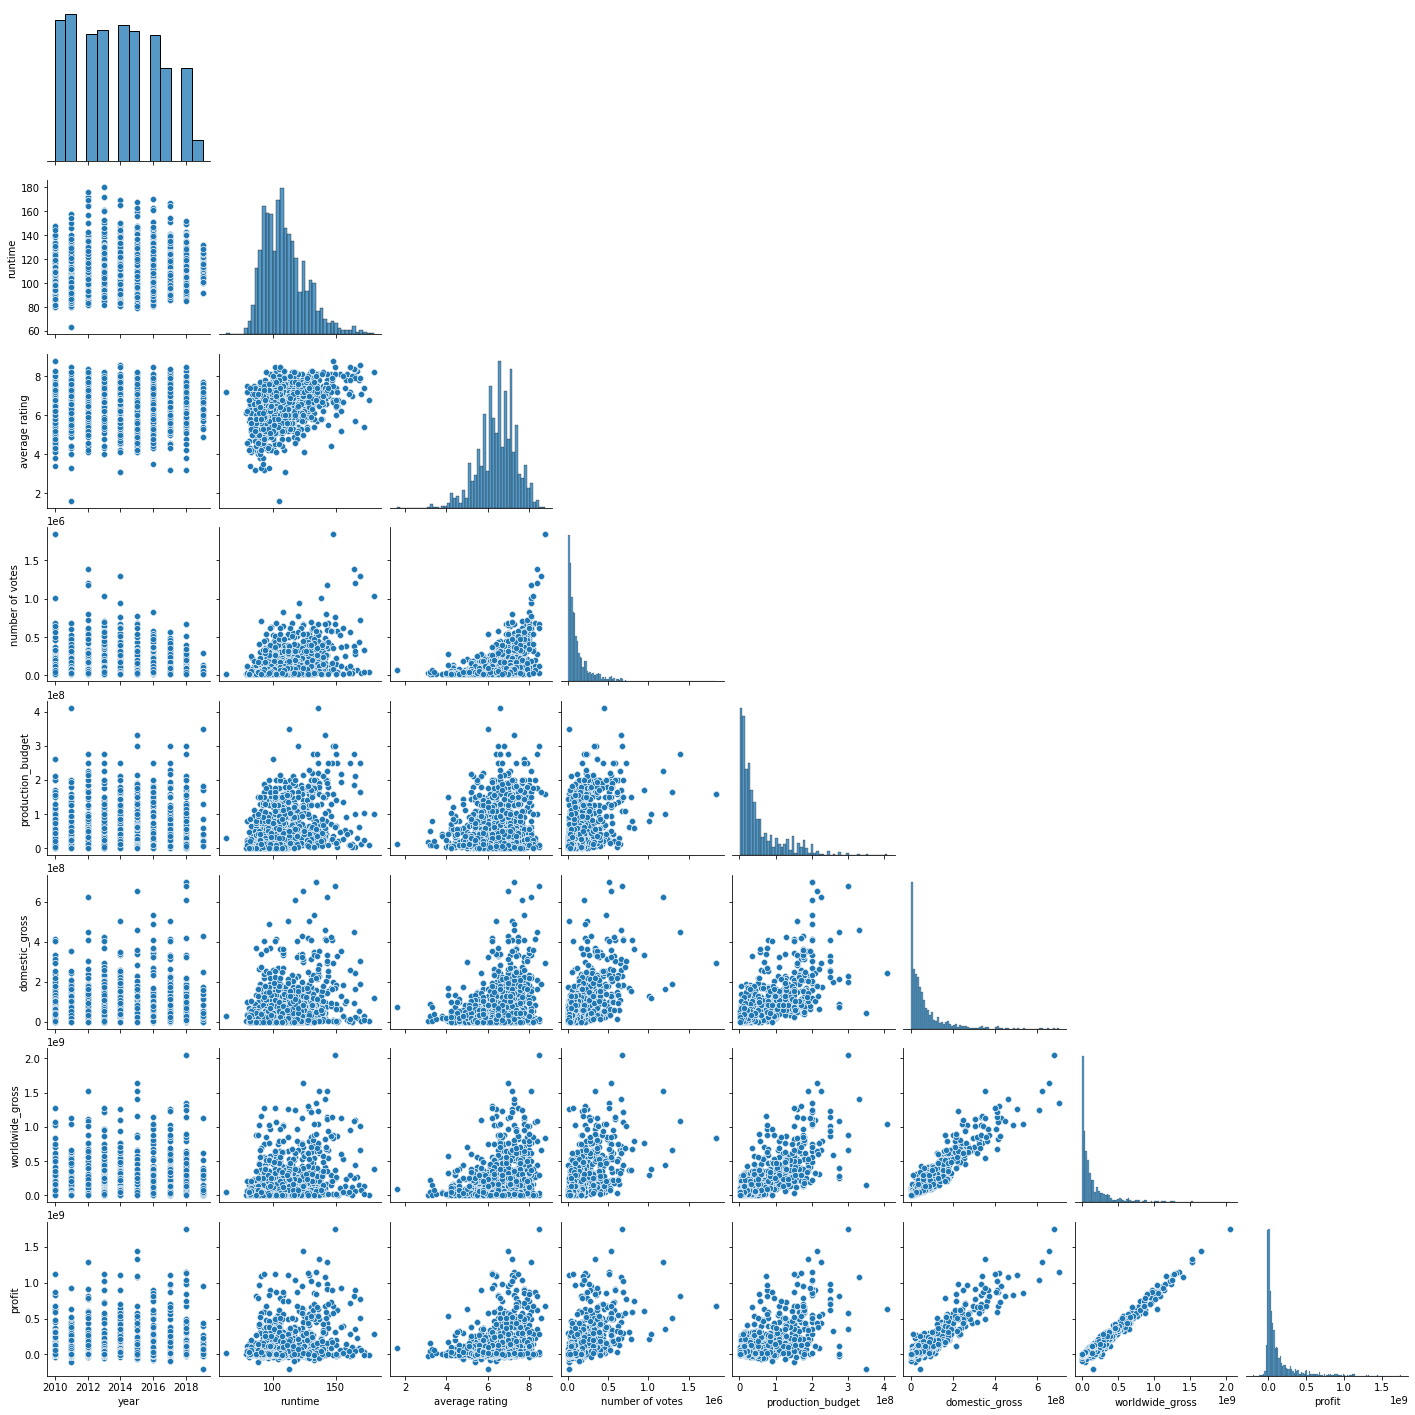

In [55]:
sns.pairplot(Imdb_newest_data, corner = True)
#doing a pairplot to take a look at the holistic data

In [56]:
genre_scatter_df = Imdb_newest_data[Imdb_newest_data['genres'].isin(['Action'])]
#assigning the old data frame to make a new one honinh in on specifying genre

<AxesSubplot:xlabel='runtime', ylabel='profit'>

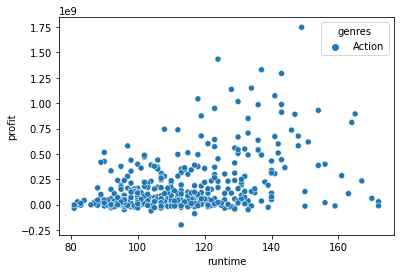

In [57]:
sns.scatterplot(data = genre_scatter_df, x = 'runtime', y ='profit', hue = 'genres')
#scatterplot for the runtime vs profit for action genre
# The higher profits are in runtimes that are > 110 minutes

In [58]:
genre_bar_df_profit = Imdb_newest_data[Imdb_newest_data['genres'].isin([ 'Action', 'Adventure', 'Fantasy', 'Animation', 'Drama', 'Comedy', 'Thriller', 'Crime', 'Romance', 'Horror','Scifi'])]
#creating new data frame for the larger columns of movies produced

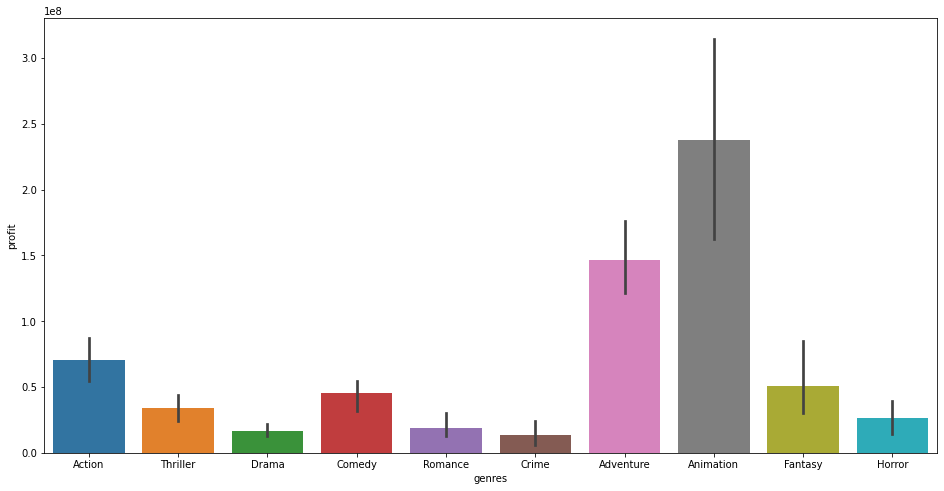

In [59]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = genre_bar_df_profit, x = 'genres', y = 'profit', estimator = np.median);
#plotting the genres and there average profit with seaborn

In [60]:
genre_bar_df_profit_most = Imdb_newest_data[Imdb_newest_data['genres'].isin([ 'Action', 'Adventure', 'Fantasy', 'Animation','Comedy', 'Thriller'])].sort_values(by= 'profit', ascending = False )
#data frame for the genres that showed the average profit
#used median because of the large spread
genre_bar_df_profit_most = genre_bar_df_profit_most.groupby('genres').median()[['profit']]

In [61]:
top_6_genres = Imdb_newest_data[Imdb_newest_data['genres'].isin([ 'Action', 'Adventure', 'Fantasy', 'Animation','Comedy', 'Thriller'])]

In [62]:
top_6_genres['movie_id'].nunique()

1040

In [63]:
genre_bar_df_profit_most = genre_bar_df_profit_most.sort_values( by = 'profit', ascending = False)

In [64]:
genre_bar_df_profit_most.reset_index(inplace = True)

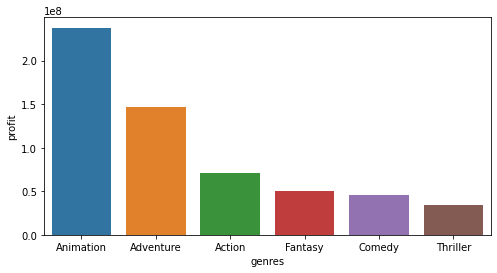

In [65]:
fig, ax = plt.subplots(figsize = (8,4))
                       
sns.barplot(x = genre_bar_df_profit_most['genres'], y = genre_bar_df_profit_most['profit'], estimator = np.median);
#barplot of the genres and their average profit's
#used median because of the large spread

In [66]:
eitan_pickle = pd.read_pickle("../directors.pkl")

In [67]:
eitan_pickle

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
44,tt3861390,Dumbo,2019,"Adventure,Family,Fantasy",112.0,en,25072,6.6,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
144,tt1263750,Room in Rome,2010,"Drama,Romance",107.0,en,20455,6.2,nm0575523,director,None,Julio Medem,1958.0,NaN,"director,writer,editor"
564,tt1305797,Enthiran,2010,"Action,Sci-Fi",155.0,en,23102,7.1,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
604,tt2180477,Nanban,2012,"Comedy,Drama",188.0,en,10512,7.5,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463669,tt6742252,The Guilty,2018,"Crime,Drama,Thriller",85.0,en,25267,7.5,nm7546166,director,None,Gustav Möller,NaN,NaN,"director,writer,actor"
463737,tt7451284,Batman Ninja,2018,"Action,Animation",85.0,en,13943,5.6,nm2459558,director,None,Junpei Mizusaki,NaN,NaN,"animation_department,director,visual_effects"
464550,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0709056,director,None,Peter Ramsey,NaN,NaN,"art_department,actor,assistant_director"
464570,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0745247,director,None,Rodney Rothman,NaN,NaN,"writer,producer,director"


# Question 2

In [68]:
imdb_persons = pd.read_sql("""
SELECT mb.movie_id, 
mb.genres,
mb.primary_title, 
pr.person_id,  
pr.category, 
p.primary_name, 
mr.averagerating,
mr.numvotes
FROM
    principals as pr
    INNER JOIN
    persons as p
    ON pr.person_id = p.person_id
    INNER JOIN
    movie_akas as ma
    ON ma.movie_id = pr.movie_id
    INNER JOIN
    movie_basics as mb
    ON mb.movie_id = pr.movie_id
    INNER JOIN
    movie_ratings as mr
    ON
    mb.movie_id = mr.movie_id
WHERE
    ma.language IS 'en'
""", con)

In [120]:
imdb_persons

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
0,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000136,actor,Johnny Depp,6.5,358813
1,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000307,actress,Helena Bonham Carter,6.5,358813
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
3,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0004266,actress,Anne Hathaway,6.5,358813
4,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0005387,producer,Joe Roth,6.5,358813
...,...,...,...,...,...,...,...,...
176689,tt9827784,"Music,Romance",FarewellSong,nm4869921,actor,Masaki Naito,7.7,6
176690,tt9827784,"Music,Romance",FarewellSong,nm5282266,actress,Mugi Kadowaki,7.7,6
176691,tt9827784,"Music,Romance",FarewellSong,nm5527231,actor,Takaya Aoyagi,7.7,6
176692,tt9827784,"Music,Romance",FarewellSong,nm5862455,actress,Nana Komatsu,7.7,6


In [70]:
imdb_persons['primary_title'] = imdb_persons['primary_title'].str.replace(':' , '').str.replace(',', '').str.replace("'", "").str.replace('-', '').str.replace('.', '').str.replace('?', '').str.replace('!', '').str.replace(" ", "")

In [71]:
imdb_persons.loc[imdb_persons['primary_title'].str.contains('StarWars')]

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
31777,tt2527336,"Action,Adventure,Fantasy",StarWarsTheLastJedi,nm0000184,writer,George Lucas,7.1,462903
31778,tt2527336,"Action,Adventure,Fantasy",StarWarsTheLastJedi,nm0000402,actress,Carrie Fisher,7.1,462903
31779,tt2527336,"Action,Adventure,Fantasy",StarWarsTheLastJedi,nm0000434,actor,Mark Hamill,7.1,462903
31780,tt2527336,"Action,Adventure,Fantasy",StarWarsTheLastJedi,nm0002354,composer,John Williams,7.1,462903
31781,tt2527336,"Action,Adventure,Fantasy",StarWarsTheLastJedi,nm0005086,producer,Kathleen Kennedy,7.1,462903
...,...,...,...,...,...,...,...,...
150016,tt3748528,"Action,Adventure,Sci-Fi",RogueOneAStarWarsStory,nm0876138,actor,Alan Tudyk,7.8,478592
150017,tt3748528,"Action,Adventure,Sci-Fi",RogueOneAStarWarsStory,nm0919363,writer,Chris Weitz,7.8,478592
150018,tt3748528,"Action,Adventure,Sci-Fi",RogueOneAStarWarsStory,nm0947447,actor,Donnie Yen,7.8,478592
150019,tt3748528,"Action,Adventure,Sci-Fi",RogueOneAStarWarsStory,nm1729428,writer,Gary Whitta,7.8,478592


In [76]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [77]:
movie_budgets['movie'] =  movie_budgets['movie'].str.replace(':' , '').str.replace(',', '').str.replace("'", "").str.replace('-', '').str.replace('.', '').str.replace('?', '').str.replace('!', '').str.replace(" ", "")

In [78]:
imdb_merge_persons_budget = imdb_persons.merge(movie_budgets, how = 'inner', left_on = 'primary_title', right_on = 'movie')

In [79]:
imdb_merge_persons_budget

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000136,actor,Johnny Depp,6.5,358813,51,"Mar 5, 2010",AliceinWonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000136,actor,Johnny Depp,6.5,358813,60,"Jul 28, 1951",AliceinWonderland,"$3,000,000",$0,$0
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000307,actress,Helena Bonham Carter,6.5,358813,51,"Mar 5, 2010",AliceinWonderland,"$200,000,000","$334,191,110","$1,025,491,110"
3,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000307,actress,Helena Bonham Carter,6.5,358813,60,"Jul 28, 1951",AliceinWonderland,"$3,000,000",$0,$0
4,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813,51,"Mar 5, 2010",AliceinWonderland,"$200,000,000","$334,191,110","$1,025,491,110"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12041,tt8976472,"Documentary,Music",NeverAgain,nm3008696,producer,Elli Toivoniemi,6.6,27,47,"Jul 12, 2002",NeverAgain,"$500,000","$307,631","$308,793"
12042,tt8976472,"Documentary,Music",NeverAgain,nm3807692,writer,Jussi Sandhu,6.6,27,47,"Jul 12, 2002",NeverAgain,"$500,000","$307,631","$308,793"
12043,tt8976472,"Documentary,Music",NeverAgain,nm4082838,cinematographer,Mikko Parttimaa,6.6,27,47,"Jul 12, 2002",NeverAgain,"$500,000","$307,631","$308,793"
12044,tt8976472,"Documentary,Music",NeverAgain,nm5380222,composer,Asger Baden & Peder,6.6,27,47,"Jul 12, 2002",NeverAgain,"$500,000","$307,631","$308,793"


In [80]:
imdb_direc = imdb_persons[imdb_persons['category'] == 'director']

In [81]:
imdb_direc

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
12,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
28,tt1182315,Thriller,DarkBuenosAires,nm1413776,director,Ramon Térmens,3.4,123
32,tt1233259,Adventure,CaptainThunder,nm0379872,director,Antonio Hernández,2.9,521
44,tt1263750,"Drama,Romance",RoominRome,nm0575523,director,Julio Medem,6.2,20455
...,...,...,...,...,...,...,...,...
176654,tt9310460,"Adventure,Animation,Comedy",CoconuttheLittleDragon2IntotheJungle,nm2106115,director,Anthony Power,5.9,43
176662,tt9356320,Comedy,SecondStarontheRight,nm5168373,director,Ruth Caudeli,7.3,6
176664,tt9644084,Documentary,DerAtem,nm0778308,director,Uli M. Schüppel,5.2,5
176681,tt9657946,Drama,Homing,nm2320629,director,Helvécio Marins Jr.,6.0,16


In [82]:
imdb_direc = imdb_direc.drop_duplicates()

In [83]:
imdb_direc

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
28,tt1182315,Thriller,DarkBuenosAires,nm1413776,director,Ramon Térmens,3.4,123
32,tt1233259,Adventure,CaptainThunder,nm0379872,director,Antonio Hernández,2.9,521
44,tt1263750,"Drama,Romance",RoominRome,nm0575523,director,Julio Medem,6.2,20455
52,tt1272051,"Adventure,Animation,Comedy",SpaceDogs,nm0882296,director,Svyatoslav Ushakov,5.2,1102
...,...,...,...,...,...,...,...,...
176654,tt9310460,"Adventure,Animation,Comedy",CoconuttheLittleDragon2IntotheJungle,nm2106115,director,Anthony Power,5.9,43
176662,tt9356320,Comedy,SecondStarontheRight,nm5168373,director,Ruth Caudeli,7.3,6
176664,tt9644084,Documentary,DerAtem,nm0778308,director,Uli M. Schüppel,5.2,5
176681,tt9657946,Drama,Homing,nm2320629,director,Helvécio Marins Jr.,6.0,16


In [84]:
imdb_direc_focus = imdb_direc[imdb_direc['genres'].str.contains('Action|Adventure|Animation|Comedy|Thriller|Fantasy', regex = True, na=False)]

In [85]:
imdb_direc_focus = imdb_direc_focus.loc[imdb_direc_focus['numvotes'] > 10000]

In [86]:
imdb_direc_focus

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
74,tt1305797,"Action,Sci-Fi",Enthiran,nm0788171,director,S. Shankar,7.1,23102
82,tt1308729,"Action,Crime,Thriller",BullettotheHead,nm0001353,director,Walter Hill,5.7,44816
125,tt1343727,"Action,Crime,Sci-Fi",Dredd,nm0871428,director,Pete Travis,7.1,234616
158,tt1401152,"Action,Mystery,Thriller",Unknown,nm1429471,director,Jaume Collet-Serra,6.9,235167
...,...,...,...,...,...,...,...,...
175734,tt4088268,"Drama,Thriller",DepartmentQAConspiracyofFaith,nm0596407,director,Hans Petter Moland,7.0,12657
175851,tt4633694,"Action,Adventure,Animation",SpiderManIntotheSpiderVerse,nm0709056,director,Peter Ramsey,8.5,210869
175852,tt4633694,"Action,Adventure,Animation",SpiderManIntotheSpiderVerse,nm0745247,director,Rodney Rothman,8.5,210869
175854,tt4633694,"Action,Adventure,Animation",SpiderManIntotheSpiderVerse,nm2130108,director,Bob Persichetti,8.5,210869


In [87]:
imdb_direc_focus = imdb_direc_focus.set_index('movie_id')

In [88]:
Imdb_newest_data_profit_movieid = Imdb_newest_data[['movie_id', 'profit']]

In [89]:
Imdb_newest_data_profit_movieid 

,movie_id,profit
0,tt0944835,160650494
0,tt0944835,160650494
0,tt0944835,160650494
5,tt4669788,18073377
5,tt4669788,18073377
...,...,...
7779,tt6133466,123617305
7779,tt6133466,123617305
7779,tt6133466,123617305
7784,tt8632862,1653715


In [90]:
Imdb_newest_data_profit_movieid = Imdb_newest_data_profit_movieid.drop_duplicates(subset = 'profit')

In [91]:
Imdb_newest_data_profit_movieid 

,movie_id,profit
0,tt0944835,160650494
5,tt4669788,18073377
10,tt1563742,73369830
15,tt1416801,-10811806
20,tt1931533,19535736
...,...,...
7765,tt2375605,227316
7774,tt3717490,22531552
7779,tt6133466,123617305
7784,tt8632862,1653715


In [92]:
imdb_dir_budg = imdb_direc_focus.join(Imdb_newest_data_profit_movieid, how = "inner", on = "movie_id")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [93]:
imdb_dir_budg

NameError: name 'imdb_dir_budg' is not defined

In [204]:
imdb_dir_budg.groupby(['primary_name', 'genres']).median().sort_values(by = 'profit', ascending = False)

,,ordering,averagerating,numvotes,profit
primary_name,genres,,,,
James Wan,"Action,Crime,Thriller",5.0,7.20,335074.0,1.328723e+09
Anthony Russo,"Action,Adventure,Sci-Fi",5.0,8.15,627216.5,1.319102e+09
Joe Russo,"Action,Adventure,Sci-Fi",6.0,8.15,627216.5,1.319102e+09
Joss Whedon,"Action,Adventure,Sci-Fi",5.0,7.70,924624.5,1.182675e+09
Ryan Coogler,"Action,Adventure,Sci-Fi",5.0,7.30,516148.0,1.148258e+09
...,...,...,...,...,...
Joel Schumacher,"Crime,Drama,Thriller",5.0,5.30,39404.0,-3.421347e+07
Guy Ritchie,"Action,Adventure,Drama",5.0,6.80,169054.0,-3.536966e+07
Robert Schwentke,"Action,Adventure,Comedy",5.0,5.60,109078.0,-5.092332e+07


In [94]:
Imdb_newest_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [95]:
top_3genres = Imdb_newest_data[Imdb_newest_data['genres'].str.contains('Action|Adventure|Animation', regex = True, na=False)]

In [96]:
top_3genres['runtime'].describe()

count    852.000000
mean     110.900235
std       17.961459
min       63.000000
25%       97.000000
50%      107.000000
75%      123.000000
max      172.000000
Name: runtime, dtype: float64

In [97]:
bins = [50, 65, 80, 95, 110, 125, 140, 155, 170, 185]
labels = ['50to65','65to80','80to95', '95to110', '110to125','125to140', '140to155', '155to170', '170to185']
top_3genres['runtime_bin'] = pd.cut(top_3genres['runtime'], bins, labels = labels)

<ipython-input-97-41c2d3dc3f9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3genres['runtime_bin'] = pd.cut(top_3genres['runtime'], bins, labels = labels)


In [98]:
bins = [50, 65, 95, 125, 155, 185]
labels = ['50to65','65to95', '95to125','125to155', '155to185']
top_3genres['runtime_bin'] = pd.cut(top_3genres['runtime'], bins, labels = labels)

<ipython-input-98-d399c30a9dda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3genres['runtime_bin'] = pd.cut(top_3genres['runtime'], bins, labels = labels)


In [99]:
top_3genres

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit,runtime_bin
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Action,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Adventure,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Action,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Adventure,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,tt2452042,The Peanuts Movie,2015,88.0,Animation,nm0553942,7.1,39149,nm0553942,director,Steve Martino,"Nov 6, 2015",99000000,130178411,250091610,151091610,65to95
7748,tt2183034,Earth to Echo,2014,91.0,Adventure,nm1757777,5.8,17627,nm1757777,director,Dave Green,"Jul 2, 2014",13000000,38934842,42174545,29174545,65to95
7774,tt3717490,Power Rangers,2017,124.0,Action,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125
7774,tt3717490,Power Rangers,2017,124.0,Adventure,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125


In [100]:
Action = top_3genres[top_3genres['genres'] == 'Action']

In [101]:
Action

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit,runtime_bin
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Action,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Action,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
40,tt1321511,Oldboy,2013,104.0,Action,nm0000490,5.8,63231,nm0000168,actor,Samuel L. Jackson,"Mar 25, 2005",3000000,707391,6239723,3239723,95to125
45,tt1843866,Captain America: The Winter Soldier,2014,136.0,Action,nm0751577,7.8,666252,nm0000168,actor,Samuel L. Jackson,"Apr 4, 2014",170000000,259746958,714401889,544401889,125to155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,tt2557478,Pacific Rim: Uprising,2018,111.0,Action,nm0215299,5.6,89462,nm3915784,actor,John Boyega,"Mar 23, 2018",155000000,59874525,290930148,135930148,95to125
7580,tt4520364,Morgan,2016,92.0,Action,nm0779524,5.8,35487,nm0544718,actress,Kate Mara,"Sep 2, 2016",8000000,3915251,7298786,-701214,65to95
7624,tt7961060,Dragon Ball Super: Broly,2018,100.0,Action,nm0619110,8.0,16465,nm0386752,actress,Aya Hisakawa,"Jan 16, 2019",8500000,30376755,122747755,114247755,95to125
7774,tt3717490,Power Rangers,2017,124.0,Action,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125


In [102]:
Adventure = top_3genres[top_3genres['genres'] == 'Adventure']

In [103]:
Animation = top_3genres[top_3genres['genres'] == 'Animation']

In [104]:
Action

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit,runtime_bin
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Action,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Action,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
40,tt1321511,Oldboy,2013,104.0,Action,nm0000490,5.8,63231,nm0000168,actor,Samuel L. Jackson,"Mar 25, 2005",3000000,707391,6239723,3239723,95to125
45,tt1843866,Captain America: The Winter Soldier,2014,136.0,Action,nm0751577,7.8,666252,nm0000168,actor,Samuel L. Jackson,"Apr 4, 2014",170000000,259746958,714401889,544401889,125to155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,tt2557478,Pacific Rim: Uprising,2018,111.0,Action,nm0215299,5.6,89462,nm3915784,actor,John Boyega,"Mar 23, 2018",155000000,59874525,290930148,135930148,95to125
7580,tt4520364,Morgan,2016,92.0,Action,nm0779524,5.8,35487,nm0544718,actress,Kate Mara,"Sep 2, 2016",8000000,3915251,7298786,-701214,65to95
7624,tt7961060,Dragon Ball Super: Broly,2018,100.0,Action,nm0619110,8.0,16465,nm0386752,actress,Aya Hisakawa,"Jan 16, 2019",8500000,30376755,122747755,114247755,95to125
7774,tt3717490,Power Rangers,2017,124.0,Action,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125


<AxesSubplot:xlabel='runtime', ylabel='profit'>

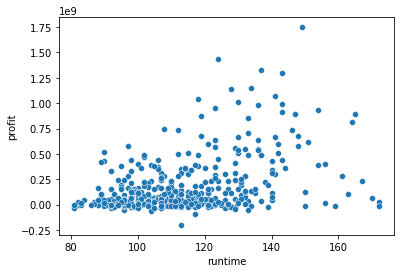

In [105]:
sns.scatterplot(x = 'runtime', y = 'profit', data = Action)

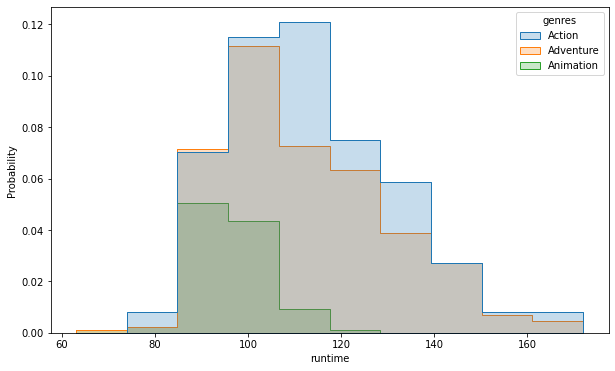

In [106]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(x = 'runtime', element = 'step', hue = 'genres', stat = 'probability', bins = 10, data = top_3genres);

<AxesSubplot:xlabel='runtime_bin', ylabel='profit'>

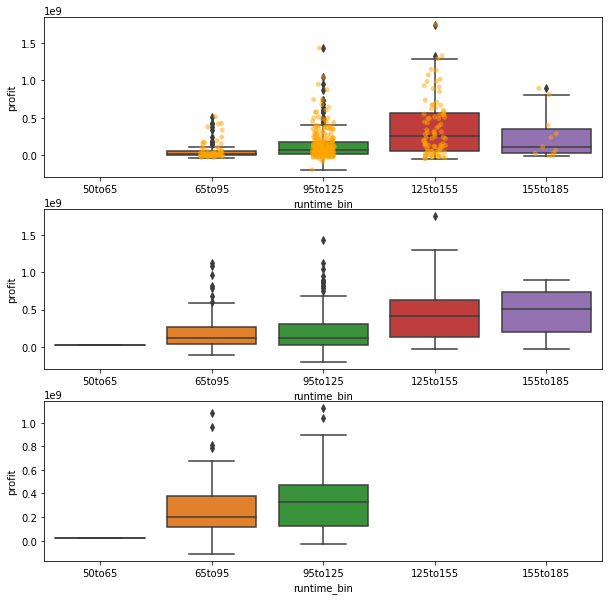

In [107]:
fig, ax = plt.subplots(3,1, figsize = (10,10))

sns.stripplot(x = 'runtime_bin', y = 'profit' , data = Action, alpha =.5, color = 'orange', ax =ax [0])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Action, ax =ax [0])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Adventure, ax =ax [1])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Animation, ax =ax [2])

<AxesSubplot:xlabel='runtime_bin', ylabel='profit'>

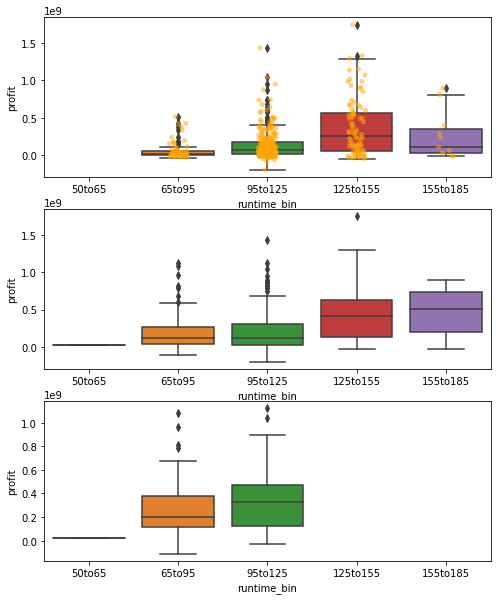

In [108]:
fig, ax = plt.subplots(3,1, figsize = (8,10))

sns.stripplot(x = 'runtime_bin', y = 'profit' , data = Action, alpha =.5, color = 'orange', ax =ax [0])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Action, ax =ax [0])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Adventure, ax =ax [1])
sns.boxplot(x = 'runtime_bin', y = 'profit' , data = Animation, ax =ax [2])

# Question 3

In [112]:
top_3genres

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit,runtime_bin
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Action,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Adventure,nm0000466,7.1,15372,nm0001114,actress,Judy Davis,"Jul 31, 2015",33000000,176847,357687,-32642313,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Action,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
35,tt0458339,Captain America: The First Avenger,2011,124.0,Adventure,nm0002653,6.9,668137,nm0000168,actor,Samuel L. Jackson,"Jul 22, 2011",140000000,176654505,370569776,230569776,95to125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,tt2452042,The Peanuts Movie,2015,88.0,Animation,nm0553942,7.1,39149,nm0553942,director,Steve Martino,"Nov 6, 2015",99000000,130178411,250091610,151091610,65to95
7748,tt2183034,Earth to Echo,2014,91.0,Adventure,nm1757777,5.8,17627,nm1757777,director,Dave Green,"Jul 2, 2014",13000000,38934842,42174545,29174545,65to95
7774,tt3717490,Power Rangers,2017,124.0,Action,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125
7774,tt3717490,Power Rangers,2017,124.0,Adventure,nm2410311,6.0,92013,nm2410311,director,Dean Israelite,"Mar 24, 2017",120000000,85364450,142531552,22531552,95to125


<AxesSubplot:xlabel='number of votes', ylabel='profit'>

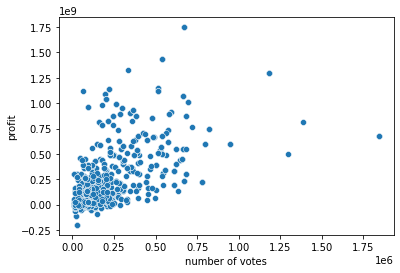

In [115]:
sns.scatterplot(x = 'number of votes', y = 'profit', data = top_3genres)

In [117]:
Imdb

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


<AxesSubplot:xlabel='number of votes', ylabel='profit'>

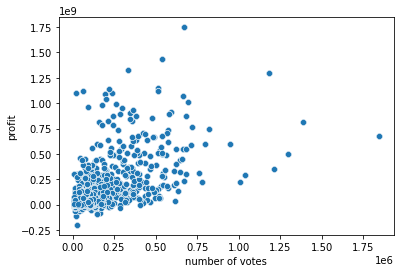

In [119]:
sns.scatterplot(x= 'number of votes', y = 'profit', data = Imdb_newest_data)

In [121]:
imdb_persons

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
0,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000136,actor,Johnny Depp,6.5,358813
1,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000307,actress,Helena Bonham Carter,6.5,358813
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
3,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0004266,actress,Anne Hathaway,6.5,358813
4,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0005387,producer,Joe Roth,6.5,358813
...,...,...,...,...,...,...,...,...
176689,tt9827784,"Music,Romance",FarewellSong,nm4869921,actor,Masaki Naito,7.7,6
176690,tt9827784,"Music,Romance",FarewellSong,nm5282266,actress,Mugi Kadowaki,7.7,6
176691,tt9827784,"Music,Romance",FarewellSong,nm5527231,actor,Takaya Aoyagi,7.7,6
176692,tt9827784,"Music,Romance",FarewellSong,nm5862455,actress,Nana Komatsu,7.7,6


In [134]:
imdb_direc = imdb_persons[imdb_persons['category'] == 'director']

In [135]:
imdb_direc

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
12,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
28,tt1182315,Thriller,DarkBuenosAires,nm1413776,director,Ramon Térmens,3.4,123
32,tt1233259,Adventure,CaptainThunder,nm0379872,director,Antonio Hernández,2.9,521
44,tt1263750,"Drama,Romance",RoominRome,nm0575523,director,Julio Medem,6.2,20455
...,...,...,...,...,...,...,...,...
176654,tt9310460,"Adventure,Animation,Comedy",CoconuttheLittleDragon2IntotheJungle,nm2106115,director,Anthony Power,5.9,43
176662,tt9356320,Comedy,SecondStarontheRight,nm5168373,director,Ruth Caudeli,7.3,6
176664,tt9644084,Documentary,DerAtem,nm0778308,director,Uli M. Schüppel,5.2,5
176681,tt9657946,Drama,Homing,nm2320629,director,Helvécio Marins Jr.,6.0,16


In [136]:
imdb_direc = imdb_direc.loc[imdb_direc['numvotes'] > 1000]

In [137]:
imdb_direc = imdb_direc.drop_duplicates()

In [138]:
imdb_direc['primary_name'].value_counts()

Takashi Miike        9
Sang-soo Hong        7
Sarik Andreasyan     7
Sion Sono            7
Uwe Boll             6
                    ..
Mez Tharatorn        1
Satoshi Nishimura    1
Juanfer Andrés       1
Ryan Gosling         1
Robin Campillo       1
Name: primary_name, Length: 2646, dtype: int64

In [139]:
imdb_direc

,movie_id,genres,primary_title,person_id,category,primary_name,averagerating,numvotes
2,tt1014759,"Adventure,Family,Fantasy",AliceinWonderland,nm0000318,director,Tim Burton,6.5,358813
44,tt1263750,"Drama,Romance",RoominRome,nm0575523,director,Julio Medem,6.2,20455
52,tt1272051,"Adventure,Animation,Comedy",SpaceDogs,nm0882296,director,Svyatoslav Ushakov,5.2,1102
58,tt1272051,"Adventure,Animation,Comedy",SpaceDogs,nm3575075,director,Inna Evlannikova,5.2,1102
74,tt1305797,"Action,Sci-Fi",Enthiran,nm0788171,director,S. Shankar,7.1,23102
...,...,...,...,...,...,...,...,...
176241,tt6198946,Horror,TheHoleintheGround,nm2091846,director,Lee Cronin,5.7,5357
176305,tt6400166,"Drama,Romance",MyBestFriend,nm1389105,director,Martín Deus,6.8,1167
176371,tt6462506,"Drama,Romance",TheDayAfter,nm0393254,director,Sang-soo Hong,7.0,1406
176381,tt6471264,Comedy,SuckMeShakespeer3,nm1480916,director,Bora Dagtekin,5.4,3654
